<a href="https://colab.research.google.com/github/karnabhonil/PDS_Workshop_1/blob/master/Trump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 1: Analysing Trump's Tweets
## Author: Nab Kar

Questions/objectives:
* How does President Trump feel about Bernie Sanders?
* How might we produce trump like Tweets?

## Part I: Trump v. Sanders

We first get the data into our Google Colab environment from a Github repository.



> ---
> *More on this*
>
> Github is a standard tool used by software developers and computer programmers of all types that makes it easy to share, update and keep track of code. It is used accross industry and academia for both personal and team-oriented projects.
>
> The Github repository for this project (https://github.com/karnabhonil/PDS_Workshop_1) simply contains the data (and some model weights) for this workshop. 

> ---


In [1]:
# This is a code cell--we can execute Python code here.
# Note that lines in the coding cells that start with '#' are comments and not interpretted as computer code.
# They are great for explaining what your code is doing in plain English!
# Also note the line below starts with '!'--these lines are interpretted as shell commands. ########MAKE THIS A BETTER/MORE ACCURATE COMMENT
!git clone https://github.com/karnabhonil/PDS_Workshop_1.git

Cloning into 'PDS_Workshop_1'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 30 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), done.


The data is now in our environment. Confirm that it's in its proper place by clicking the folder on the left-hand side of the screen and checking what was exactly copied before continuing (you should be able to find a file called 'trumpstweets.csv').

Python allows for users to use *libraries* (groups of related functions) created by the community. In fact, libraries are one of the reasons Python is so widely used! There is a vast body of great libraries that Python programmer rely on regularly.

In [0]:
# We import several key libraries here:
#   'pandas' for handling our data
#   'matplotlib.pyplot' for our graphs and figures
#   'TextBlob' for analysing our textual data
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

Note that we import each of the libraries *as* something else. This is for clarity and faster development. Now, we can use the shorthand 'plt' to refer to 'matplotlib.pyplot' (which is quite annoying to type out!).

Example: the function called *show()* in 'matplotlib.pyplot' can be called using 'plt.show()' instead of 'matplotlib.pyplot.show()'.

We noted that 'pandas' is our go-to library for handling out data. We will use its *read_csv()* function to read in our raw data. Use this function to set a variable 'df' to hold our data.

Recall that we won't be using the full keyword 'pandas' when refering to the library, but rather the shorthand we defined when importing the library.

> ---
> *More on this*
>
> Pandas stores data in what it called a 'DataFrame'. You can think of it as a well-organized table or matrix of the data.
>
> ---

One convenient way to see what a variable holds is by simple typing the variable's name as it's own line of code at the end of a code cell. After setting the variable, let's check what the content of 'df' are by doing this.

In [4]:
### YOUR CODE HERE


,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN


You've successfully loaded the data into Python! What does the data look like? What different information does it contain (and which of these are we primarily interested in)? How many samples does the data contain?

Let's now extract our desired information, *contents*. Set a variable to just contain this information by indexing into *df* using square brckets, [ ]. Note that you will have to use quotes, " ", around the column name when indexing. Put the contents in a variable called *contents*.

After you've done this, let's try to see how Trump feels about some democrats, say Bernie Sanders. We can search the contents for occurances of 'Bernie' and only look at those Tweets (we have done this for you in the variable called *bernies*).

In [0]:
# finds occurances of "Bernie Sanders" in "content"
### YOUR CODE HERE
content = df["content"]
idx = content.str.find("Bernie") != -1
bernies = df[idx]

Let's not apply \~machine learning\~ methods to do some *sentiment analysis*. In this case, that's finding out how Trump feels about Bernie.

Specifically, in our specific library, there are two ways we are going to understand each Tweet's sentiment: _polarity_ ($\in [-1,1]$) and _subjectivity_ ($\in [0,1]$).

Part of the code is written for you. We will be *iterating* over each of the Tweets regarding Bernie, and then calling the *.sentiment.polarity* and *.sentiment.subjectivity* methods to get these two relevant quantitiues.

Let's store these values in a different column of *bernies*: *sentiment_polarity* and *sentiment_subjectivity*. To create a new column in our DataFrame, read the documentation in:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html


In [11]:
# apply sentiment analysis
for idx, row in bernies.iterrows():
  single_tweet = TextBlob(row.content)
  ### YOUR CODE HERE


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Now our _bernies_ DataFrame also contains values for Trump's sentiment! Let's compute some basic quantities of interest for these data. Specifically, print out the mean value and standard deviation of the _sentiment_polarity_ column we just created. Additionally, quickly plot a histogram of the values using _plt.hist()_ (note: call plt.show() to show the plot). Repeat this for the _sentiment_subjectivity_ column.

Polarity: Mean: -0.037951
Std: 0.307511


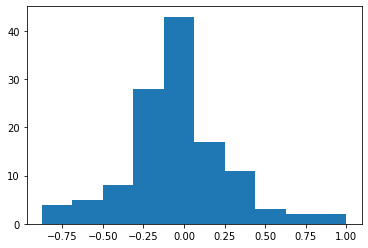

Subjectivity: Mean: 0.460923
Std: 0.262217


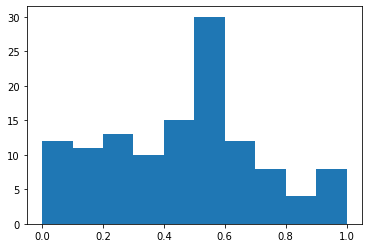

In [17]:
# compute basic statistics and plot
### YOUR CODE HERE
print("Polarity: Mean: %f\nStd: %f" % (bernies["sentiment_polarity"].mean(), bernies["sentiment_polarity"].std()))
plt.hist(bernies["sentiment_polarity"])
plt.show()

print("Subjectivity: Mean: %f\nStd: %f" % (bernies["sentiment_subjectivity"].mean(), bernies["sentiment_subjectivity"].std()))
plt.hist(bernies["sentiment_subjectivity"])
plt.show()